In [1]:
import pandas as pd #to read the data
from sklearn.linear_model import LogisticRegression #To use lr to make prediction
from sklearn.model_selection import train_test_split #to split the data into train and test
import warnings #ignore the warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("data.csv")

In [2]:
df

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500,1
1,582.30,4.7,473,5.5,0,0.041,4,228.00,0.6946,1.5,0.8700,1
2,33.00,4.7,149,5.8,0,0.071,4,228.00,0.6946,1.5,0.9800,1
3,33.00,4.7,169,5.8,1,0.000,4,228.00,0.6946,1.5,1.3200,1
4,33.00,4.7,116,5.6,0,0.045,4,228.00,0.6946,1.5,0.9100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,12.30,1.2,40,5.6,6,0.320,18,42.47,0.1200,5.1,0.1898,1
8740,8.80,2.0,33,5.5,6,0.260,18,48.58,0.1290,5.1,0.2187,1
8741,10.00,1.8,33,5.9,2,0.000,18,91.00,0.9920,4.8,1.5200,1
8742,79.00,1.8,33,6.3,2,0.000,18,26.00,3.5530,6.0,1.4300,1


In [3]:
df.shape

(8744, 12)

In [4]:
df.size

104928

In [5]:
df.head()

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,10.0,4.7,158,6.0,0,0.030,4,228.0,0.6946,1.5,1.05,1
1,582.3,4.7,473,5.5,0,0.041,4,228.0,0.6946,1.5,0.87,1
2,33.0,4.7,149,5.8,0,0.071,4,228.0,0.6946,1.5,0.98,1
3,33.0,4.7,169,5.8,1,0.000,4,228.0,0.6946,1.5,1.32,1
4,33.0,4.7,116,5.6,0,0.045,4,228.0,0.6946,1.5,0.91,1


In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8744 entries, 0 to 8743
Columns: 12 entries, Depth to Status
dtypes: float64(8), int64(4)
memory usage: 819.9 KB


In [7]:
df.describe()

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
count,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,65.812670,6.742312,232.308783,5.877395,0.924634,0.024010,85.052036,66.867752,0.947285,1.819903,0.978988,0.679666
std,124.386646,5.746148,175.204819,0.428123,1.050445,0.037211,90.780883,67.782994,2.751548,2.281790,0.184047,0.466632
min,0.000000,0.000000,5.000000,5.500000,0.000000,0.000000,0.000000,8.000000,0.008000,0.110000,0.040000,0.000000
25%,10.000000,2.900000,80.000000,5.600000,0.000000,0.000000,24.000000,26.300000,0.046850,0.160000,0.850000,0.000000
50%,25.000000,5.050000,209.000000,5.700000,1.000000,0.000000,51.000000,38.950000,0.318000,1.500000,0.960000,1.000000
75%,44.200000,8.700000,353.000000,6.000000,2.000000,0.049000,125.000000,67.000000,0.694600,1.900000,1.090000,1.000000
max,691.600000,43.700000,934.000000,9.100000,6.000000,0.350000,821.000000,313.000000,37.874000,15.800000,2.110000,1.000000


In [8]:
df.isnull()

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,False,False,False,False,False,False,False,False,False,False,False,False
8740,False,False,False,False,False,False,False,False,False,False,False,False
8741,False,False,False,False,False,False,False,False,False,False,False,False
8742,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
Status                        0
dtype: int64

In [10]:
df.dtypes

Depth                         float64
Depth Error                   float64
Depth Seismic Stations          int64
Magnitude                     float64
Magnitude Type                  int64
Magnitude Error               float64
Magnitude Seismic Stations      int64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
Status                          int64
dtype: object

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#data visulisation purpose

In [12]:
df

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500,1
1,582.30,4.7,473,5.5,0,0.041,4,228.00,0.6946,1.5,0.8700,1
2,33.00,4.7,149,5.8,0,0.071,4,228.00,0.6946,1.5,0.9800,1
3,33.00,4.7,169,5.8,1,0.000,4,228.00,0.6946,1.5,1.3200,1
4,33.00,4.7,116,5.6,0,0.045,4,228.00,0.6946,1.5,0.9100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,12.30,1.2,40,5.6,6,0.320,18,42.47,0.1200,5.1,0.1898,1
8740,8.80,2.0,33,5.5,6,0.260,18,48.58,0.1290,5.1,0.2187,1
8741,10.00,1.8,33,5.9,2,0.000,18,91.00,0.9920,4.8,1.5200,1
8742,79.00,1.8,33,6.3,2,0.000,18,26.00,3.5530,6.0,1.4300,1


In [13]:
df

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500,1
1,582.30,4.7,473,5.5,0,0.041,4,228.00,0.6946,1.5,0.8700,1
2,33.00,4.7,149,5.8,0,0.071,4,228.00,0.6946,1.5,0.9800,1
3,33.00,4.7,169,5.8,1,0.000,4,228.00,0.6946,1.5,1.3200,1
4,33.00,4.7,116,5.6,0,0.045,4,228.00,0.6946,1.5,0.9100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,12.30,1.2,40,5.6,6,0.320,18,42.47,0.1200,5.1,0.1898,1
8740,8.80,2.0,33,5.5,6,0.260,18,48.58,0.1290,5.1,0.2187,1
8741,10.00,1.8,33,5.9,2,0.000,18,91.00,0.9920,4.8,1.5200,1
8742,79.00,1.8,33,6.3,2,0.000,18,26.00,3.5530,6.0,1.4300,1


In [16]:
import numpy as np

In [17]:
df_max=df.max()
df_max

Depth                         691.600
Depth Error                    43.700
Depth Seismic Stations        934.000
Magnitude                       9.100
Magnitude Type                  6.000
Magnitude Error                 0.350
Magnitude Seismic Stations    821.000
Azimuthal Gap                 313.000
Horizontal Distance            37.874
Horizontal Error               15.800
Root Mean Square                2.110
Status                          1.000
dtype: float64

In [18]:
df_min=df.min()

In [19]:
x_normal=(df-df_min)/(df_max-df_min)
x_normal

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,0.014459,0.107551,0.164693,0.138889,0.000000,0.085714,0.004872,0.721311,0.018132,0.088591,0.487923,1.0
1,0.841961,0.107551,0.503767,0.000000,0.000000,0.117143,0.004872,0.721311,0.018132,0.088591,0.400966,1.0
2,0.047715,0.107551,0.155005,0.083333,0.000000,0.202857,0.004872,0.721311,0.018132,0.088591,0.454106,1.0
3,0.047715,0.107551,0.176534,0.083333,0.166667,0.000000,0.004872,0.721311,0.018132,0.088591,0.618357,1.0
4,0.047715,0.107551,0.119483,0.027778,0.000000,0.128571,0.004872,0.721311,0.018132,0.088591,0.420290,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,0.017785,0.027460,0.037675,0.027778,1.000000,0.914286,0.021924,0.113016,0.002958,0.318037,0.072367,1.0
8740,0.012724,0.045767,0.030140,0.000000,1.000000,0.742857,0.021924,0.133049,0.003195,0.318037,0.086329,1.0
8741,0.014459,0.041190,0.030140,0.111111,0.333333,0.000000,0.021924,0.272131,0.025986,0.298917,0.714976,1.0
8742,0.114228,0.041190,0.030140,0.222222,0.333333,0.000000,0.021924,0.059016,0.093620,0.375398,0.671498,1.0


In [20]:
df.isnull().sum()

Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
Status                        0
dtype: int64

In [21]:
df1=df
df1

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
0,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500,1
1,582.30,4.7,473,5.5,0,0.041,4,228.00,0.6946,1.5,0.8700,1
2,33.00,4.7,149,5.8,0,0.071,4,228.00,0.6946,1.5,0.9800,1
3,33.00,4.7,169,5.8,1,0.000,4,228.00,0.6946,1.5,1.3200,1
4,33.00,4.7,116,5.6,0,0.045,4,228.00,0.6946,1.5,0.9100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,12.30,1.2,40,5.6,6,0.320,18,42.47,0.1200,5.1,0.1898,1
8740,8.80,2.0,33,5.5,6,0.260,18,48.58,0.1290,5.1,0.2187,1
8741,10.00,1.8,33,5.9,2,0.000,18,91.00,0.9920,4.8,1.5200,1
8742,79.00,1.8,33,6.3,2,0.000,18,26.00,3.5530,6.0,1.4300,1


,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Status
Depth,1.000000,-0.028062,0.130056,0.066650,-0.027199,-0.012991,-0.031541,0.004521,-0.035850,0.015756,-0.132910,-0.030872
Depth Error,-0.028062,1.000000,0.152556,-0.015597,-0.185855,0.014731,-0.108621,0.038675,-0.207118,-0.228444,0.055591,0.176500
Depth Seismic Stations,0.130056,0.152556,1.000000,0.319458,-0.175332,0.040369,0.068369,-0.087151,-0.316230,-0.376992,-0.120053,0.195714
Magnitude,0.066650,-0.015597,0.319458,1.000000,0.026950,-0.015937,0.011394,-0.105775,-0.020130,0.005998,0.096120,-0.018073
Magnitude Type,-0.027199,-0.185855,-0.175332,0.026950,1.000000,-0.026875,0.188281,-0.210158,0.148471,0.262450,-0.161511,-0.006324
Magnitude Error,-0.012991,0.014731,0.040369,-0.015937,-0.026875,1.000000,-0.003141,0.005069,-0.012963,-0.075913,-0.002729,0.039170
Magnitude Seismic Stations,-0.031541,-0.108621,0.068369,0.011394,0.188281,-0.003141,1.000000,-0.218835,0.044470,-0.078047,-0.051360,0.151817
Azimuthal Gap,0.004521,0.038675,-0.087151,-0.105775,-0.210158,0.005069,-0.218835,1.000000,-0.043522,0.036113,0.097642,-0.276620
Horizontal Distance,-0.035850,-0.207118,-0.316230,-0.020130,0.148471,-0.012963,0.044470,-0.043522,1.000000,0.476871,-0.073285,-0.150214
Horizontal Error,0.015756,-0.228444,-0.376992,0.005998,0.262450,-0.075913,-0.078047,0.036113,0.476871,1.000000,-0.077569,-0.402996


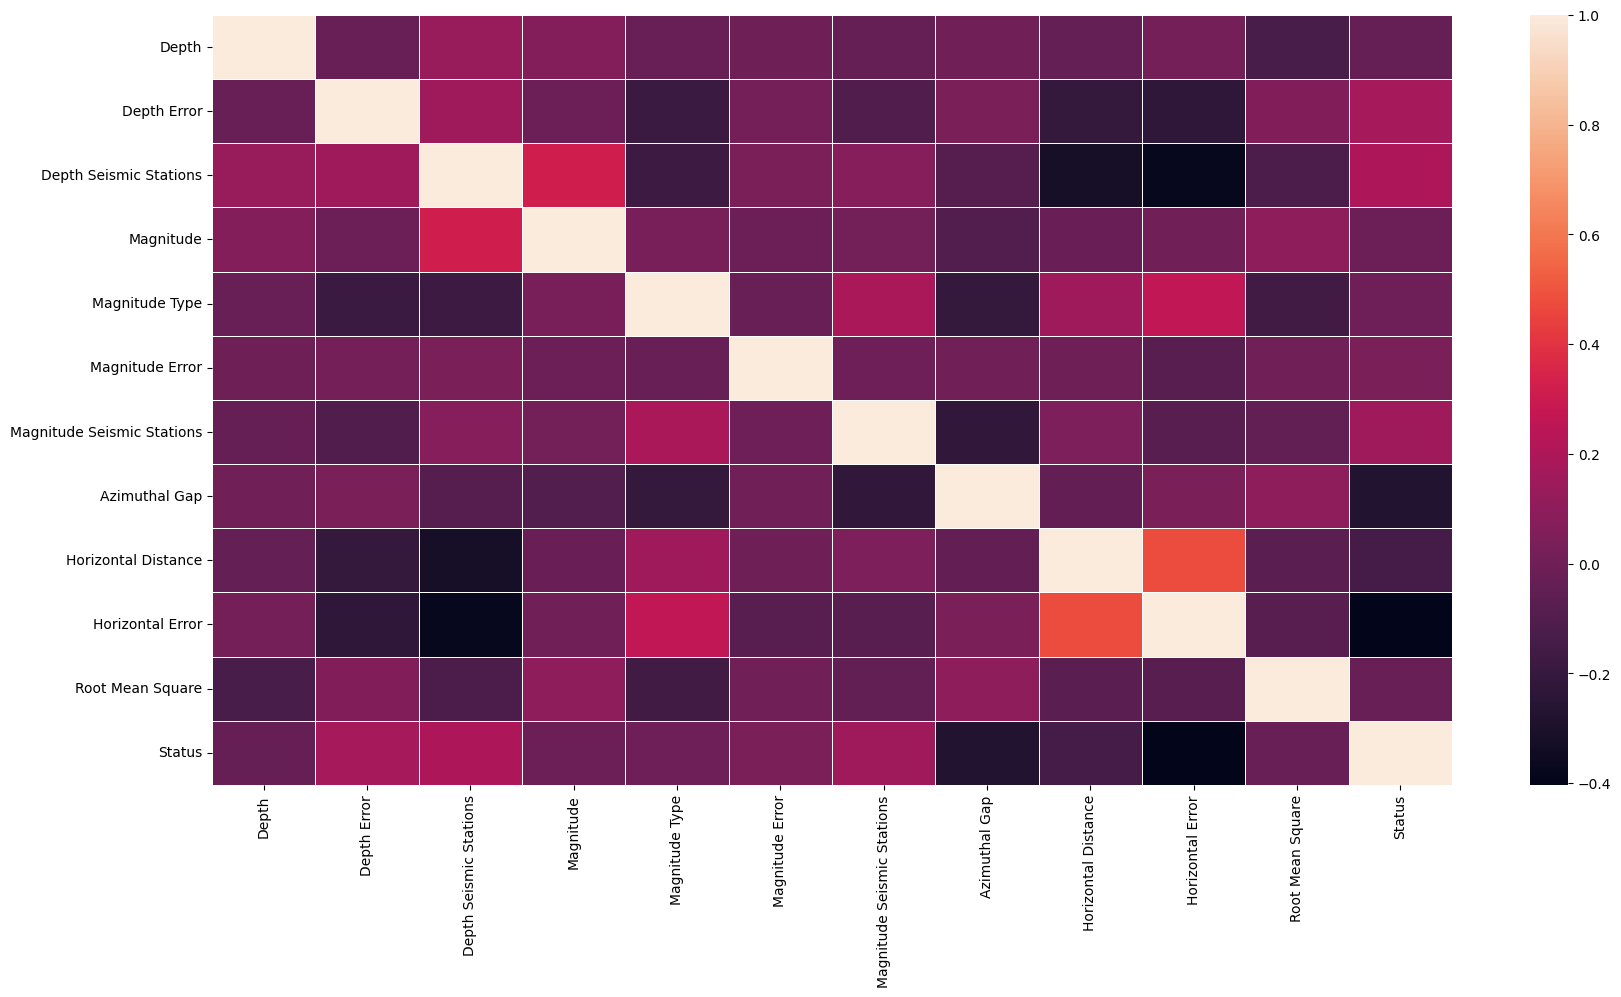

In [22]:
f=plt.subplots(figsize=(20,10))
corr=df.corr()
corr=(corr)
sns.heatmap(corr,xticklabels=corr.columns.values,linewidth=0.5,yticklabels=corr.columns.values)
corr

In [23]:
X=df.drop(["Status"],axis=1)
Y=df["Status"]

In [24]:
X

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
0,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500
1,582.30,4.7,473,5.5,0,0.041,4,228.00,0.6946,1.5,0.8700
2,33.00,4.7,149,5.8,0,0.071,4,228.00,0.6946,1.5,0.9800
3,33.00,4.7,169,5.8,1,0.000,4,228.00,0.6946,1.5,1.3200
4,33.00,4.7,116,5.6,0,0.045,4,228.00,0.6946,1.5,0.9100
...,...,...,...,...,...,...,...,...,...,...,...
8739,12.30,1.2,40,5.6,6,0.320,18,42.47,0.1200,5.1,0.1898
8740,8.80,2.0,33,5.5,6,0.260,18,48.58,0.1290,5.1,0.2187
8741,10.00,1.8,33,5.9,2,0.000,18,91.00,0.9920,4.8,1.5200
8742,79.00,1.8,33,6.3,2,0.000,18,26.00,3.5530,6.0,1.4300


In [25]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
8739    1
8740    1
8741    1
8742    1
8743    1
Name: Status, Length: 8744, dtype: int64

In [26]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

In [27]:
X_train

,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
7897,46.0,1.8,21,5.8,2,0.000,46,22.0,5.34700,7.50,0.83
7987,10.0,1.6,21,6.3,2,0.000,41,16.0,7.86200,7.80,0.90
4797,10.0,5.1,143,5.8,0,0.090,53,46.0,0.31800,1.61,1.12
4053,15.0,2.5,274,5.9,0,0.052,79,31.6,0.01622,0.14,0.70
2756,25.8,35.0,362,5.8,0,0.000,141,35.9,0.01622,0.14,0.72
...,...,...,...,...,...,...,...,...,...,...,...
4373,35.0,6.2,54,5.6,0,0.000,152,98.4,0.31800,1.61,1.15
7891,10.0,1.7,21,6.0,2,0.000,15,26.0,4.22500,8.40,0.90
4859,34.0,18.6,345,5.8,0,0.000,53,15.4,0.31800,1.61,0.73
3264,56.3,6.6,96,5.5,0,0.045,22,54.4,0.01622,0.14,0.83


In [28]:
Y_train

7897    0
7987    0
4797    1
4053    0
2756    1
       ..
4373    1
7891    0
4859    1
3264    1
2732    1
Name: Status, Length: 6120, dtype: int64

In [29]:
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [30]:
predictions= logmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7942073170731707

In [32]:
X_train= X_train.T
Y_train= Y_train.T
X_test= X_test.T
Y_test= Y_test.T

In [33]:
accuracies={}
lr = LogisticRegression()
lr.fit(X_train.T,Y_train.T)
acclr= lr.score(X_test.T, Y_test.T)*100
accuracies['Logistic Regression']=acclr
print("test accuracy {:.2f}%".format(acclr))

test accuracy 79.42%


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train.T, Y_train.T)
prediction = knn.predict(X_test.T)
print("{} NN Score: {:.2f}%".format(2, knn.score(X_test.T,Y_test.T)*100))

2 NN Score: 77.86%


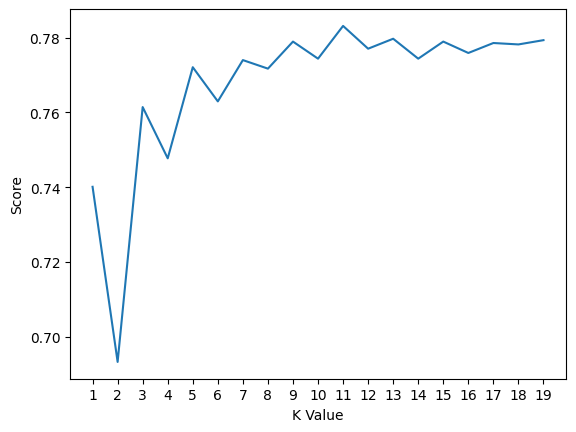

Maximum KNN Score is 78.32%


In [35]:
scoreList=[]
for i in range(1,20):
    knn2 =KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train.T,Y_train.T)
    scoreList.append(knn2.score(X_test.T,Y_test.T))
    
plt.plot(range(1,20),scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K Value")
plt.ylabel("Score")
plt.show()

accknn=max(scoreList)*100
accuracies["KNN"]=accknn
print("Maximum KNN Score is {:.2f}%".format(accknn))

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=1000, random_state=12)
rf.fit(X_train.T,Y_train.T)
accrf=rf.score(X_test.T,Y_test.T)*100
accuracies['Random Forest']=100
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(accrf))


Random Forest Algorithm Accuracy Score: 93.29%


In [37]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train.T,Y_train.T)
accsvm= svm.score(X_test.T, Y_test.T)*100
accuracies['SVM']=accsvm
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(accsvm))

Test Accuracy of SVM Algorithm: 76.87%


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train.T,Y_train.T)
accdt=dt.score(X_test.T, Y_test.T)*100
accuracies['DT']=accdt
print("Test Accuracy of DECISON TREE Algorithm: {:.2f}%".format(accdt))

Test Accuracy of DECISON TREE Algorithm: 94.02%


In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.T,Y_train.T)
accgnb=gnb.score(X_test.T,Y_test.T)*100
accuracies['GNB']=100
print("Navies Bayes Accuracy Score: {:.2f}%".format(accgnb))

Navies Bayes Accuracy Score: 78.66%


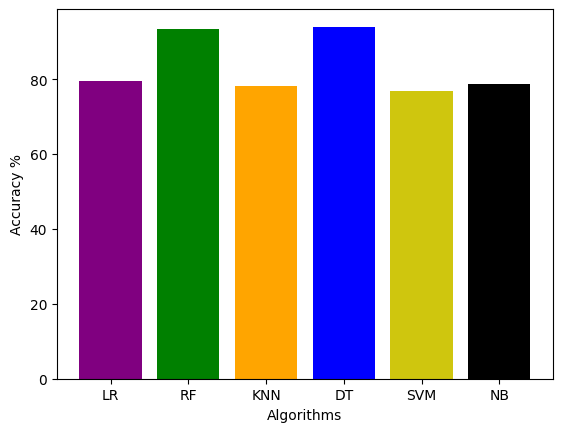

<Figure size 1000x500 with 0 Axes>

In [40]:
plt.bar(['LR'],[acclr], label="DT", color='purple')
plt.bar(['RF'],[accrf], label="RF", color='green')
plt.bar(['KNN'],[accknn], label="KNN", color='orange')
plt.bar(['DT'],[accdt], label="DT", color='blue')
plt.bar(['SVM'],[accsvm], label="SVM", color='#CFC60E')
plt.bar(['NB'],[accgnb], label="NB", color='black')

plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.figure(figsize=(10,5))

plt.show()

In [42]:
import pickle
pickle.dump(dt,open('dtt.pkl','wb'))

In [43]:
import numpy as np
#data=np.to_numpy([60.7220,153.6700,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500])
data=pd.DataFrame([60.7220,153.6700,10.00,4.7,158,6.0,0,0.030,4,228.00,0.6946,1.5,1.0500])
data

,0
0,60.7220
1,153.6700
2,10.0000
3,4.7000
4,158.0000
5,6.0000
6,0.0000
7,0.0300
8,4.0000
9,228.0000


In [44]:
data=[[-21.2160,-179.2550,632.80,2.2,70,6.0,0,0.000,4,228.00,0.6946,1.5,1.0000]]

In [45]:
data=np.array(data)
print(data)
data=np.reshape(-1, 1)

[[ -21.216  -179.255   632.8       2.2      70.        6.        0.
     0.        4.      228.        0.6946    1.5       1.    ]]


In [46]:
type(X_train)

pandas.core.frame.DataFrame

In [49]:
import pickle
modell=pickle.load(open('dt.pkl','rb'))
data1=[[582.30,4.7,473,5.5,0,0.041,4,228.00,0.6946,1.5,0.8700]]

In [50]:
modell.predict(data1)[0]

1

In [51]:

def eqp(b):
    if dt.predict(b)==1:
        print("EARTH QUAKE DETECTED")
    else:  
        print("NO EARTQUAKE")
    

In [52]:
eqp(data1)

EARTH QUAKE DETECTED


In [57]:
nani=[[33.00,4.7,149,5.8,0,0.071,4,228.00,0.6946,1.5,0.9800]]

In [58]:
dt.predict(nani)

array([1], dtype=int64)

In [59]:
eqp(nani)

EARTH QUAKE DETECTED


In [64]:
batli=[[10,4.7,202,5.6,0,0,4,228,0.6946,1.5,1.03]]

In [65]:
eqp(batli)

NO EARTQUAKE
